In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from la_liga import Utility

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv("data/season-1011_csv.csv")

In [6]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,SP1,28/08/10,Hercules,Ath Bilbao,0,1,A,0,0,D,...,2.26,2.12,1.73,1.67,25,0.0,1.92,1.84,2.10,1.95
1,SP1,28/08/10,Levante,Sevilla,1,4,A,1,2,A,...,2.05,1.95,1.92,1.82,15,0.0,2.75,2.54,1.53,1.48
2,SP1,28/08/10,Malaga,Valencia,1,3,A,1,1,D,...,2.14,2.04,1.80,1.74,19,0.0,2.25,2.08,1.83,1.71
3,SP1,29/08/10,Espanol,Getafe,3,1,H,1,0,H,...,2.43,2.25,1.65,1.60,21,0.0,1.57,1.51,2.69,2.48
4,SP1,29/08/10,La Coruna,Zaragoza,0,0,D,0,0,D,...,2.40,2.21,1.67,1.62,19,0.0,1.54,1.49,2.64,2.50


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  HS        380 non-null    int64  
 11  AS        380 non-null    int64  
 12  HST       380 non-null    int64  
 13  AST       380 non-null    int64  
 14  HF        380 non-null    int64  
 15  AF        380 non-null    int64  
 16  HC        380 non-null    int64  
 17  AC        380 non-null    int64  
 18  HY        380 non-null    int64  
 19  AY        380 non-null    int64  
 20  HR        380 non-null    int64 

In [8]:
data[data["FTAG"] == data["FTHG"].max()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
110,SP1,20/11/10,Almeria,Barcelona,0,8,A,0,5,A,...,1.6,1.55,2.5,2.36,16,1.5,1.98,1.95,1.98,1.93


In [9]:
data["FTHG"].sum() + data["FTAG"].sum()

1042

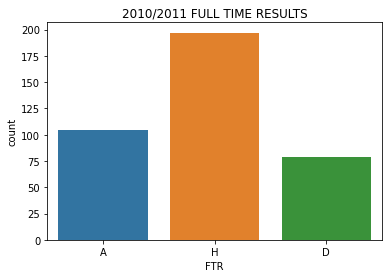

In [10]:
sns.countplot(data["FTR"])
plt.title("2010/2011 FULL TIME RESULTS")
plt.savefig("full_time_results.png")

In [11]:
data["FTR"].value_counts()

H    197
A    104
D     79
Name: FTR, dtype: int64

In [12]:
data["HTR"].value_counts()

H    154
D    138
A     88
Name: HTR, dtype: int64

In [13]:
home_win = []
for team in data["HomeTeam"].unique():
    home_win.append(Utility.extract_team_wins(data,"HomeTeam","FTR",team))

In [14]:
table = dict()
for index, team in enumerate(data["HomeTeam"].unique()):
    table[team] = home_win[index]

In [15]:
home_loss = []
for team in data["HomeTeam"].unique():
    home_loss.append(Utility.extract_team_wins(data,"HomeTeam","FTR",team,mode="A"))

In [16]:
loss_table = {team: home_loss[index] for index,team in enumerate(data["HomeTeam"].unique())}

In [17]:
def get_goal_difference(df,source: str, col: str, against: str, team: str) -> tuple:
    matches = df[df[source] == team]
    goal_scored = matches[col].sum()
    goal_against = matches[against].sum()
    return goal_scored - goal_against, goal_scored, goal_against

In [18]:
get_goal_difference(data,"HomeTeam","FTHG","FTAG","Barcelona")

(36, 46, 10)

In [19]:
first_half = data.iloc[:189,:22]

In [20]:
first_wins = [Utility.extract_team_wins(first_half,"HomeTeam","FTR",item)
              for item in first_half["HomeTeam"].unique()]

In [21]:
first_loss = [Utility.extract_team_wins(first_half,"HomeTeam","FTR",item,"A")
              for item in first_half["HomeTeam"].unique()]

In [22]:
tempo = {item: first_wins[index] for index, item in enumerate(first_half["HomeTeam"].unique())}

In [23]:
another = {item: first_loss[index] for index, item in enumerate(first_half["HomeTeam"].unique())}

In [24]:
first_away_wins = [Utility.extract_team_wins(first_half,"AwayTeam","FTR",item,"A")
              for item in first_half["AwayTeam"].unique()]

In [25]:
away = {item: first_away_wins[index] for index, item in enumerate(first_half["AwayTeam"].unique())}

In [26]:
first_away_loss = [Utility.extract_team_wins(first_half,"AwayTeam","FTR",item,"H")
              for item in first_half["AwayTeam"].unique()]

In [27]:
away_loss = {item: first_away_loss[index] for index, item in enumerate(first_half["AwayTeam"].unique())}

In [28]:
another["points"] = [loss * 3 for loss in another.values()]

In [29]:
del another["points"]

In [30]:
home_goals = [get_goal_difference(first_half,"HomeTeam","FTHG","FTAG",game) for game in first_half["HomeTeam"].unique()]

In [31]:
away_goals = [get_goal_difference(first_half,"AwayTeam","FTAG","FTHG",game) for game in first_half["AwayTeam"].unique()]

In [32]:
first_half["HomeTeam"].unique(),home_goals

(array(['Hercules', 'Levante', 'Malaga', 'Espanol', 'La Coruna',
        'Mallorca', 'Osasuna', 'Santander', 'Sociedad', 'Ath Madrid',
        'Ath Bilbao', 'Barcelona', 'Real Madrid', 'Valencia', 'Getafe',
        'Sevilla', 'Sp Gijon', 'Villarreal', 'Zaragoza', 'Almeria'],
       dtype=object),
 [(7, 19, 12),
  (-2, 11, 13),
  (-7, 12, 19),
  (10, 17, 7),
  (1, 10, 9),
  (11, 15, 4),
  (6, 11, 5),
  (3, 9, 6),
  (3, 14, 11),
  (10, 16, 6),
  (7, 17, 10),
  (21, 28, 7),
  (25, 30, 5),
  (7, 17, 10),
  (4, 18, 14),
  (0, 15, 15),
  (0, 12, 12),
  (19, 24, 5),
  (-7, 13, 20),
  (-10, 9, 19)])

In [33]:
first_wins

[5, 3, 2, 8, 3, 6, 4, 4, 5, 5, 7, 8, 9, 6, 5, 4, 3, 9, 3, 0]

In [34]:
first_loss

[3, 5, 6, 1, 2, 2, 1, 2, 4, 2, 3, 1, 0, 1, 4, 4, 4, 0, 5, 3]

In [35]:
first_away_wins

[2, 4, 5, 3, 0, 6, 2, 9, 3, 0, 3, 1, 0, 1, 1, 2, 2, 3, 3, 3]

In [36]:
first_away_loss

[5, 5, 3, 4, 4, 1, 6, 0, 4, 5, 5, 6, 8, 7, 7, 6, 5, 6, 6, 6]

In [37]:
first_half["AwayTeam"].unique(),first_away_loss

(array(['Ath Bilbao', 'Sevilla', 'Valencia', 'Getafe', 'Zaragoza',
        'Real Madrid', 'Almeria', 'Barcelona', 'Villarreal', 'Sp Gijon',
        'Ath Madrid', 'Hercules', 'Osasuna', 'Santander', 'Levante',
        'La Coruna', 'Mallorca', 'Espanol', 'Malaga', 'Sociedad'],
       dtype=object),
 [5, 5, 3, 4, 4, 1, 6, 0, 4, 5, 5, 6, 8, 7, 7, 6, 5, 6, 6, 6])

In [72]:
def create_league_table(df: pd.DataFrame) -> pd.DataFrame:
    home = df["HomeTeam"].unique()
    res = pd.DataFrame(index=range(1,21))
    wins = []
    loss = []
    draws = []
    points = []
    goals_scored = []
    goals_conceded = []
    goals_difference = []
    for index,team in enumerate(home):
        home_wins = Utility.extract_team_wins(df,"HomeTeam","FTR",team)
        home_losses = Utility.extract_team_wins(df,"HomeTeam","FTR",team,mode="A")
        away_wins = Utility.extract_team_wins(df,"AwayTeam","FTR",team,mode="A")
        away_losses = Utility.extract_team_wins(df,"AwayTeam","FTR",team)

        total_wins = home_wins + away_wins
        total_loss = home_losses + away_losses
        total_draws = 38 - (total_wins + total_loss)
        wins.append(total_wins)
        loss.append(total_loss)
        draws.append(38 - total_wins + total_loss)
        points.append((total_wins * 3) + total_draws)

        home_goal_diff,home_goal_scored,home_goal_against = Utility.get_goal_difference(df,"HomeTeam","FTHG","FTAG",team)
        away_goal_diff,away_goal_scored,away_goal_against = Utility.get_goal_difference(df,"AwayTeam","FTAG","FTHG",team)

        goals_scored.append(home_goal_scored + away_goal_scored)
        goals_conceded.append(home_goal_against + away_goal_against)
        goals_difference.append(home_goal_diff + away_goal_diff)

    res["Team"] = home
    res["Pld"] = [38 for _ in range(20)]
    res["W"] = wins
    res["D"] = draws
    res["L"] = loss  
    res["GF"] = goals_scored
    res["GA"] = goals_conceded
    res["GD"] = goals_difference
    res["Pts"] = points
    return res

In [76]:
league = create_league_table(data)

0.11686921119689941


In [84]:
new_table = league.sort_values(by="Pts",axis=0,ascending=False)
new_table.set_index(pd.Index(range(1,21)),inplace=True)

In [85]:
new_table

,Team,Pld,W,D,L,GF,GA,GD,Pts
1,Barcelona,38,30,10,2,95,21,74,96
2,Real Madrid,38,29,13,4,102,33,69,92
3,Valencia,38,21,26,9,64,44,20,71
4,Villarreal,38,18,32,12,54,44,10,62
5,Sevilla,38,17,35,14,62,61,1,58
6,Ath Bilbao,38,18,36,16,59,55,4,58
7,Ath Madrid,38,17,35,14,62,53,9,58
8,Espanol,38,15,42,19,46,55,-9,49
9,Osasuna,38,13,42,17,45,46,-1,47
10,Sp Gijon,38,11,40,13,35,42,-7,47


In [87]:
new_table.to_csv("league/league_08_09.csv")